In [12]:
#Import packages to statt working
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
from google.colab import drive

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
train= pd.read_csv("/content/drive/MyDrive/train_go05W65.csv")
train1=train.copy()
test= pd.read_csv("/content/drive/MyDrive/test_VkM91FT.csv")
test1=test.copy()

In [16]:
train.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8']
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00']
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"


## Let's do some EDA

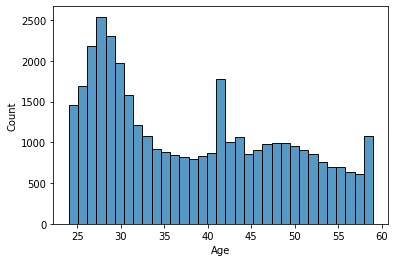

In [17]:
sns.histplot(train.Age)

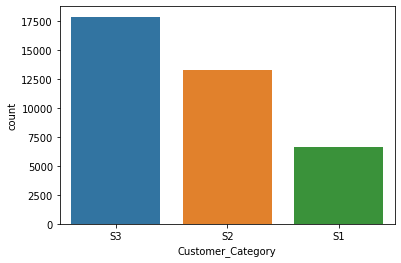

In [18]:
sns.countplot(train.Customer_Category);

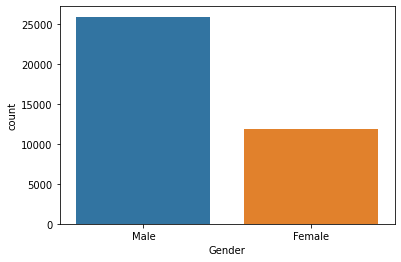

In [19]:
sns.countplot(train.Gender);

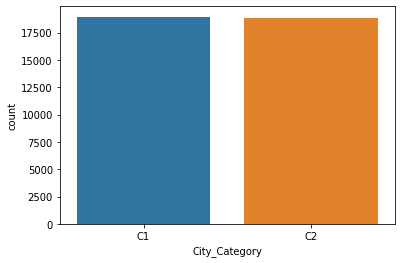

In [20]:
sns.countplot(train.City_Category)

In [21]:
test_id= test['Customer_ID']

In [22]:
train_id=train['Customer_ID']

In [23]:
target = train['Product_Holding_B2']
train = train.drop(['Product_Holding_B2'],axis=1)

In [24]:
train['t']=1
test['t']=0

In [25]:
data=pd.DataFrame()
data=train.append(test)

In [26]:
data.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,t
0,CC264719,Male,41,14,0,C1,S3,['P16'],1
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",1
2,CC319633,Female,59,14,0,C2,S2,['P11'],1
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",1
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']",1


In [27]:
d= pd.DataFrame()
d['a']= data['Product_Holding_B1']

In [28]:
d['a'] = d['a'].str[1:-1]
    

In [29]:
d['a']

0                      'P16'
1               'P13', 'P20'
2                      'P11'
3                'P8', 'P13'
4        'P16', 'P17', 'P21'
                ...         
20322                  'P16'
20323                  'P16'
20324                  'P13'
20325      'P8', 'P9', 'P16'
20326    'P12', 'P13', 'P17'
Name: a, Length: 58075, dtype: object

In [30]:
d['a']=d['a'].str.replace("'","")

In [31]:
d['a']

0                  P16
1             P13, P20
2                  P11
3              P8, P13
4        P16, P17, P21
             ...      
20322              P16
20323              P16
20324              P13
20325      P8, P9, P16
20326    P12, P13, P17
Name: a, Length: 58075, dtype: object

In [32]:
a = d.a.unique()
r = d['a'].str.get_dummies(', ')
len(r.columns)

22

In [33]:
result = pd.concat([data, r], axis=1)

In [34]:
result = result.drop(['Product_Holding_B1'],axis=1)

In [35]:
data = result

In [36]:
result.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,t,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P3,P4,P5,P6,P7,P8,P9
0,CC264719,Male,41,14,0,C1,S3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CC209679,Female,47,14,1,C1,S2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,CC319633,Female,59,14,0,C2,S2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CC231413,Female,32,16,0,C1,S2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,CC259633,Male,30,15,0,C2,S3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0


In [37]:
from sklearn import preprocessing
data = data.drop(['Gender'], axis=1)
for x in data.columns:
    if data[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(data[x].values))  
        data[x] = lbl.transform(list(data[x].values))
        #seprating test and train
        train = data[data['t'] == 1]
        test = data[data['t'] == 0]
#dropping 0 and 1 from 
        train= train.drop(["t"], axis=1)
        test= test.drop(["t"], axis=1)

In [38]:
test.head()

,Customer_ID,Age,Vintage,Is_Active,City_Category,Customer_Category,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P3,P4,P5,P6,P7,P8,P9
0,39515,31,31,0,1,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4823,28,37,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,49774,31,12,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50808,55,11,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,55081,51,49,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
train.head()

,Customer_ID,Age,Vintage,Is_Active,City_Category,Customer_Category,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P3,P4,P5,P6,P7,P8,P9
0,16426,41,14,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3284,47,14,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,29474,59,14,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8168,32,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,15164,30,15,0,1,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
train.columns

Index(['Customer_ID', 'Age', 'Vintage', 'Is_Active', 'City_Category',
       'Customer_Category', 'P00', 'P1', 'P10', 'P11', 'P12', 'P13', 'P14',
       'P15', 'P16', 'P17', 'P18', 'P19', 'P2', 'P20', 'P21', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9'],
      dtype='object')

In [41]:
test.columns

Index(['Customer_ID', 'Age', 'Vintage', 'Is_Active', 'City_Category',
       'Customer_Category', 'P00', 'P1', 'P10', 'P11', 'P12', 'P13', 'P14',
       'P15', 'P16', 'P17', 'P18', 'P19', 'P2', 'P20', 'P21', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9'],
      dtype='object')

In [42]:
p= pd.DataFrame()
p['b']= target
p['b'] = p['b'].str[1:-1]
p['b']= p['b'].str.replace("'","")
    
l = p['b'].str.get_dummies(', ')

In [43]:
g=l.columns

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [45]:
print(train.shape)
print(test.shape)
print(l.shape)

(37748, 28)
(20327, 28)
(37748, 20)


## Train the Model

In [46]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 51)
rf_classifier.fit(train, l)
y_pred_rf = rf_classifier.predict(test)


In [50]:
!pip install scikit-multilearn

     |████████████████████████████████| 89 kB 6.3 MB/s 


In [51]:
!pip install future --upgrade

     |████████████████████████████████| 829 kB 14.9 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=acc886174a88893fb65fca7b8179996df2898832c14548fc542b3cfe5e735ab0
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: future
    Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [52]:
from skmultilearn.problem_transform import ClassifierChain,LabelPowerset,BinaryRelevance

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:

...
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
classifier=ClassifierChain(GaussianNB())

In [57]:
classifier1=LabelPowerset(model)

In [58]:
classifier2=BinaryRelevance(GaussianNB())

In [59]:
classifier1.fit(train,l)

LabelPowerset(classifier=LogisticRegression(multi_class='multinomial'),
              require_dense=[True, True])

In [60]:
predict_lr=classifier1.predict(train)

In [61]:
accuracy_score(l,predict_lr)

0.15651160326374908

In [62]:
predict=rf_classifier.predict(train)

In [63]:
accuracy_score(l,predict)

0.9998675426512663

In [64]:
final=pd.DataFrame(y_pred_rf)

In [65]:
final.columns=l.columns

In [66]:
final.head()

,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P2,P20,P3,P4,P5,P6,P7,P8,P9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
final['Customer_ID']=test_id

In [68]:

final['Product_Holding_B2']=''

In [69]:
final['Product_Holding_B2']

0         
1         
2         
3         
4         
        ..
20322     
20323     
20324     
20325     
20326     
Name: Product_Holding_B2, Length: 20327, dtype: object

In [70]:
for col_name in final.columns:
    final.loc[final[col_name]==1, 'Product_Holding_B2']=final['Product_Holding_B2']+ ', ' +"'"+col_name+"'"

In [71]:
final['Product_Holding_B2'] = final['Product_Holding_B2'].str[2:]
final['Product_Holding_B2'] = '['+ final['Product_Holding_B2'].astype(str) + ']'

In [72]:
final

,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P2,P20,P3,P4,P5,P6,P7,P8,P9,Customer_ID,Product_Holding_B2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CC372708,[]
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CC216072,['P8']
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CC387629,['P13']
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CC389228,[]
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CC394445,['P00']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CC303542,['P8']
20323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CC266713,['P8']
20324,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CC393639,['P00']
20325,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CC285013,['P1']


In [73]:
final=final.drop(g,axis=1)

In [74]:
final['Product_Holding_B2']=final['Product_Holding_B2'].replace({"[]":np.NaN})

In [75]:
final.isna().sum()

Customer_ID              0
Product_Holding_B2    1365
dtype: int64

In [76]:
final['Product_Holding_B2'].value_counts().argmax()
final.Product_Holding_B2.value_counts(sort=True)
final.Product_Holding_B2.fillna(final['Product_Holding_B2'].value_counts().argmax(),inplace=True)

In [77]:
final.head()

,Customer_ID,Product_Holding_B2
0,CC372708,0
1,CC216072,['P8']
2,CC387629,['P13']
3,CC389228,0
4,CC394445,['P00']


In [78]:
export_csv = final.to_csv (r'C:\Users\ABHISHEK\ML\Untitled Folder 1\final.csv', index = None, header=True)